In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
import pandas as pd
import polars as pl
import sys

sys.path.append('/data100t1/home/biand/Projects/PheWES/src')
from pheML_develop import *
from plotting import *

/belowshare/vumcshare/data100t1/home/biand/miniforge3/envs/cchc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
celiac_case = pd.read_csv('/data100t1/home/biand/Projects/PheWES/data/celiac_case_GRID_BioVU.txt', names=['grid'])
celiac_case.head()

,grid
0,R200961637
1,R200961637
2,R202239786
3,R202830629
4,R219371703


In [7]:
celiac_case.drop_duplicates(subset=['grid']).to_csv('../data/celiac_case_GRIDs.txt', index=False, header=False)

In [ ]:
celiac_case.grid.unique()

303

In [3]:
phecode_map = pd.read_csv(config['phecode_map_file'], dtype={'Phecode':str})
phecode_map = phecode_map[['Phecode', 'PhecodeString']].drop_duplicates(ignore_index=True)
phecode_map.Phecode = phecode_map.Phecode.apply(lambda x: x.strip())
phecode_map.index = phecode_map.Phecode
phecode_map.drop(columns=['Phecode'], inplace=True)
phecode_map = phecode_map.to_dict()
phecode_map = phecode_map['PhecodeString']

In [4]:
data = pd.read_csv('../results/celiac_1111/screening_data_for_ML.csv')
data.head()

,grid,250.11,250.1,535.6,250.21,537,758.1,264.1,758,535.2,...,789,244.1,550.2,276.14,281,264.3,716,695,475,label
0,R200020420,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,R200034807,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,R200078956,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,R200105072,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,R200130574,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [7]:
data[data.label==0].head()

,grid,250.11,250.1,535.6,250.21,537,758.1,264.1,758,535.2,...,789,244.1,550.2,276.14,281,264.3,716,695,475,label
2788,R200023188,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2789,R200032501,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2790,R200043326,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2791,R200047771,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2792,R200051631,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
rf_model = joblib.load('../results/celiac_1111/PheML_RF_screening.model')

Using tree explainer


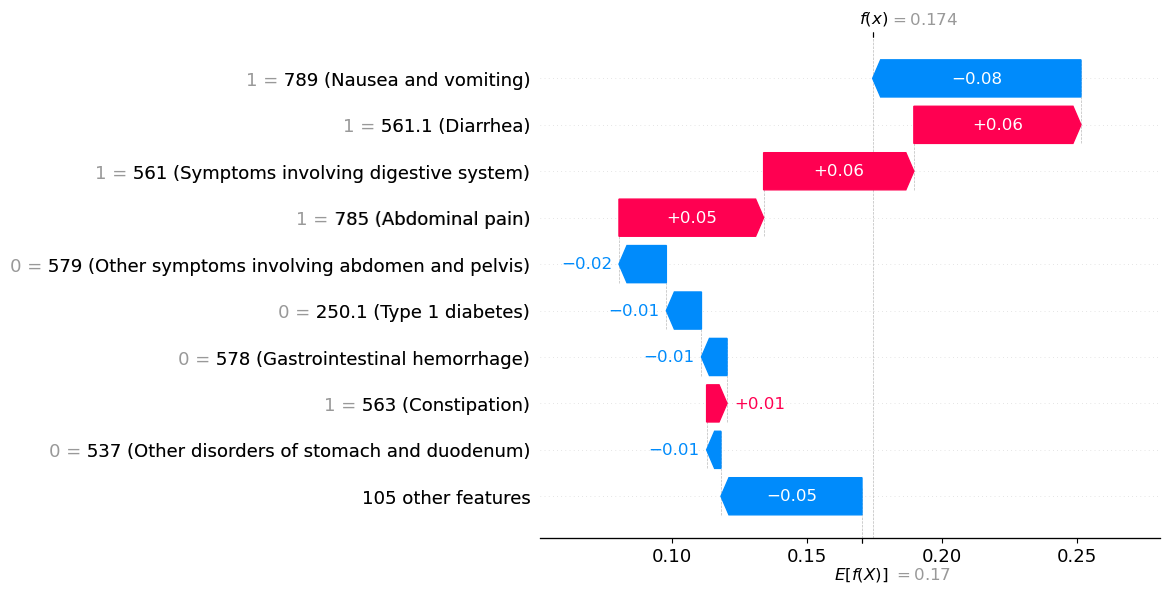

In [10]:
interpret_model(rf_model, data.iloc[:5], 'R200130574', phecode_map, show=True)

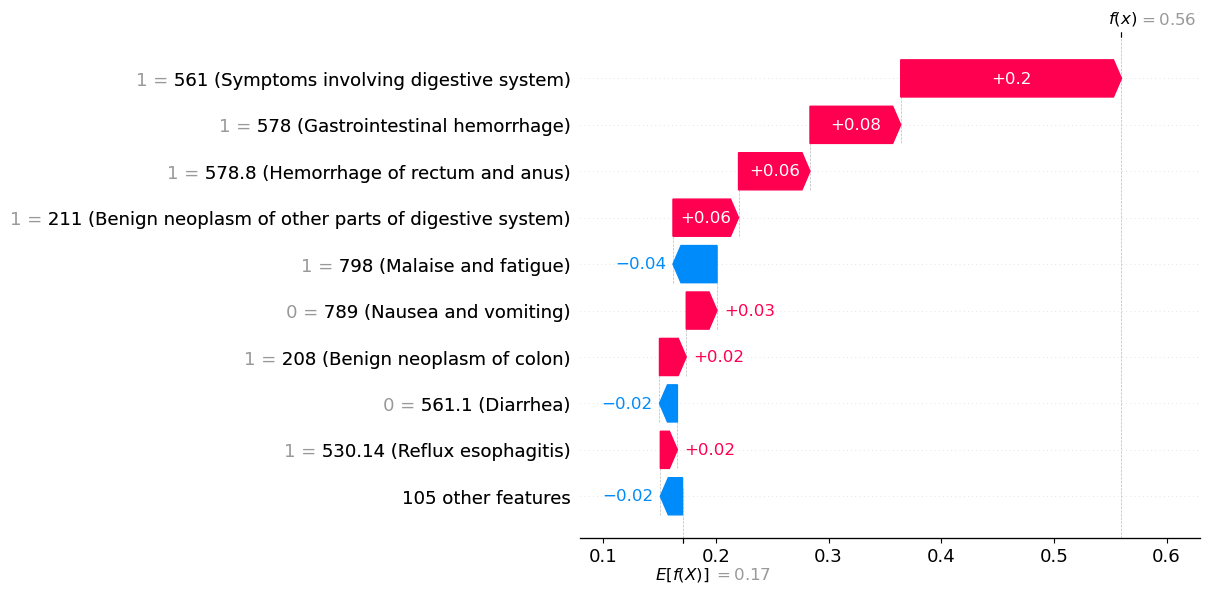

In [9]:
interpret_model(rf_model, data.iloc[:1000], 'R200020420', phecode_map, show=True)

Using tree explainer


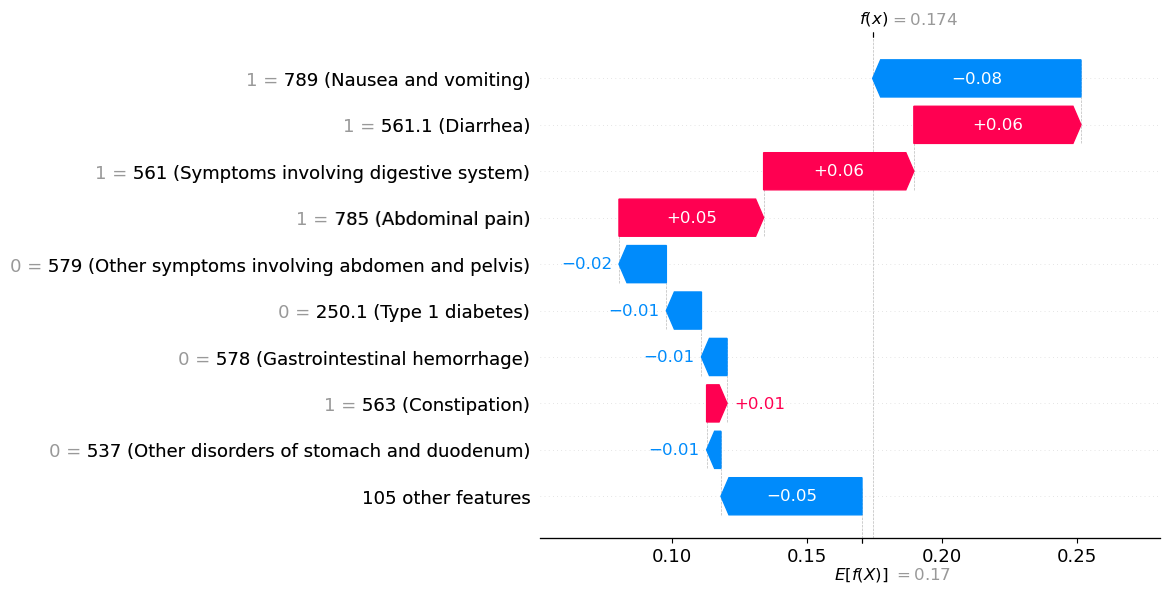

In [6]:
interpret_model(rf_model, data.iloc[:1000], 'R200130574', phecode_map, show=True)

In [2]:
cases = pd.read_csv('/data100t1/home/biand/Projects/PheWES/data/celiac_case_GRIDs.txt')
cases.head()

,grid
0,R200961637
1,R202239786
2,R202830629
3,R219371703
4,R220989408


In [3]:
sd_phecode = pd.read_csv('/data100t1/share/synthetic-deriv/phecodes/all-sd-phecodes-mar-2025/sd_samples_phecode.binary.txt.gz', compression='gzip', sep='\t')
sd_phecode.head()

: 

In [3]:
cases = pl.read_csv('/data100t1/home/biand/Projects/PheWES/data/celiac_case_GRIDs.txt')
cases.head()

grid
str
"""R200961637"""
"""R202239786"""
"""R202830629"""
"""R219371703"""
"""R220989408"""


In [6]:
sd_phecode = pl.read_csv('/data100t1/share/synthetic-deriv/phecodes/all-sd-phecodes-mar-2025/sd_samples_phecode.binary.txt.gz', separator='\t')
sd_phecode.head()

grid,008,008.5,008.51,008.52,008.6,008.7,010,031,031.1,038,038.1,038.2,038.3,041,041.1,041.11,041.12,041.2,041.21,041.4,041.8,041.9,053,053.1,054,060,070,070.1,070.2,070.3,070.4,070.9,071,071.1,078,079,…,963,963.1,964,964.1,965,965.1,965.2,965.3,966,967,969,971,972,972.1,972.2,972.6,973,974,975,976,977,979,980,981,983,984,985,986,987,988,989,990,994,994.1,994.2,994.21,996
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""R200000048""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R200000069""",0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R200000084""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R200000141""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R200000176""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
celiac_phecode = sd_phecode.filter(pl.col('grid').is_in(cases['grid']))

/tmp/ipykernel_2977827/551017092.py:1: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  celiac_phecode = sd_phecode.filter(pl.col('grid').is_in(cases['grid']))


In [10]:
celiac_phecode

grid,008,008.5,008.51,008.52,008.6,008.7,010,031,031.1,038,038.1,038.2,038.3,041,041.1,041.11,041.12,041.2,041.21,041.4,041.8,041.9,053,053.1,054,060,070,070.1,070.2,070.3,070.4,070.9,071,071.1,078,079,…,963,963.1,964,964.1,965,965.1,965.2,965.3,966,967,969,971,972,972.1,972.2,972.6,973,974,975,976,977,979,980,981,983,984,985,986,987,988,989,990,994,994.1,994.2,994.21,996
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""R200130574""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R200961637""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
"""R200995944""",0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
"""R201005482""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R202239786""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""R296529424""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R297579156""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R298014443""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
data.head()

,grid,535.6,695.21,537,535.2,535,535.8,279.7,695.2,250.1,...,244.4,569,261.2,530.1,262,259,250.3,472,563,label
0,R200130574,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,R200961637,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,R200995944,0,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0,1,1
3,R201005482,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,R202239786,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


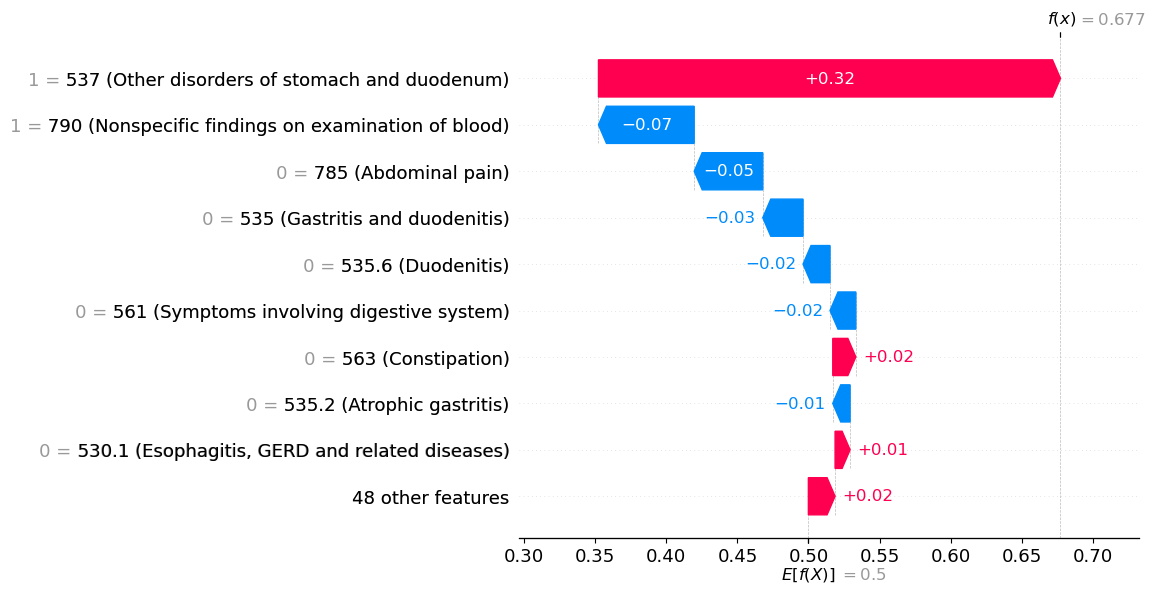

In [8]:
# data = pd.read_csv('../results/celiac_1008/1008_data_for_ML.csv')
# rf_model = joblib.load('../results/celiac_1008/PheML_RF_1008.model')
interpret_model(rf_model['model'], data, 'R202239786', phecode_map, show=True)

In [9]:
data.shape

(1803, 59)

# Adjust the decision threshold to increase recall

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix
import pandas as pd

In [4]:
data = pd.read_csv('../results/celiac_XG/screening_data_for_ML.csv')
data.head()

,grid,250.11,250.1,535.6,250.21,537,264.1,535.2,535,758.1,...,532,798,264.3,276.4,572,550.2,716,695,285,label
0,R200020420,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,R200034807,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,R200078956,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,R200105072,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,R200130574,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
def get_all_grids(case_control_file):
    df = pd.read_csv(case_control_file, sep='\t')
    case_grids = set(df['case'].dropna().tolist())
    control_cols = [col for col in df.columns if col.startswith('Control')]
    control_grids = set([g for g in pd.unique(df[control_cols].values.ravel()) if pd.notna(g)])
    all_grids = case_grids | control_grids
    return list(all_grids)

train_grids = get_all_grids('../results/celiac_XG/case_control_pairs_screening_train.txt')
test_grids = get_all_grids('../results/celiac_XG/case_control_pairs_screening_test.txt')

# X_train, X_test, y_train, y_test = train_test_split(data[phecode_features_], data.label, train_size=0.8,
#                                                     random_state=2024, stratify=data.label)
train_data = data[data.grid.isin(train_grids)]
test_data = data[data.grid.isin(test_grids)]
X_train, y_train = train_data.iloc[:, 1:-1], train_data.label
X_test, y_test = test_data.iloc[:, 1:-1], test_data.label

In [15]:
XG_model = joblib.load('../results/celiac_XG/PheML_XG_screening.model')

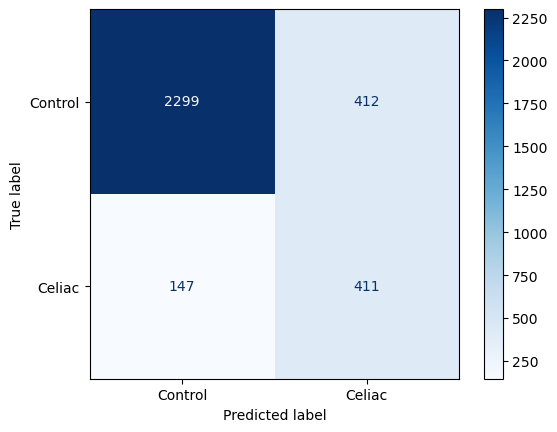

In [16]:
class_names = ['Control', 'Celiac']
disp = ConfusionMatrixDisplay.from_estimator(
        XG_model,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
    )

In [17]:
y_prob = XG_model.predict_proba(X_test)[:, 1]

target_recall = 0.8
for t in np.linspace(1, 0, 101):
    y_pred = (y_prob >= t).astype(int)
    if recall_score(y_test, y_pred) >= target_recall:
        print(f"Threshold achieving recall ≥ {target_recall}: {t:.2f}")
        break

Threshold achieving recall ≥ 0.8: 0.41


In [18]:
def plot_confusion_with_threshold(model, X, y, threshold=0.5):
    y_prob = model.predict_proba(X)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix (threshold={threshold:.2f})")
    plt.show()
    print(f"Recall: {recall_score(y, y_pred):.3f}")
    print(f"Precision: {precision_score(y, y_pred):.3f}")

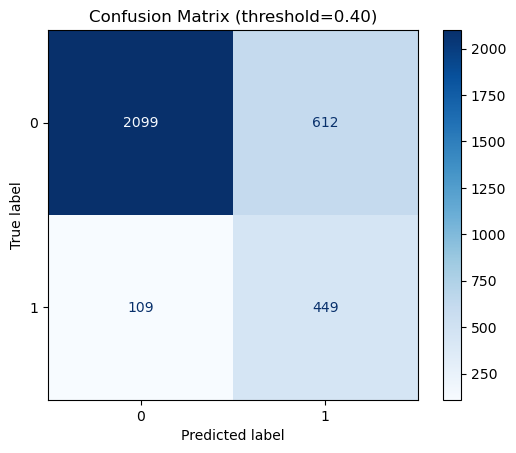

Recall: 0.805
Precision: 0.423


In [19]:
plot_confusion_with_threshold(XG_model, X_test, y_test, 0.4)

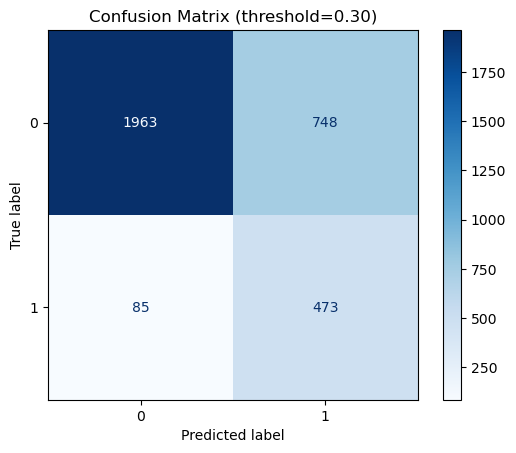

Recall: 0.848
Precision: 0.387


In [21]:
plot_confusion_with_threshold(XG_model, X_test, y_test, 0.3)

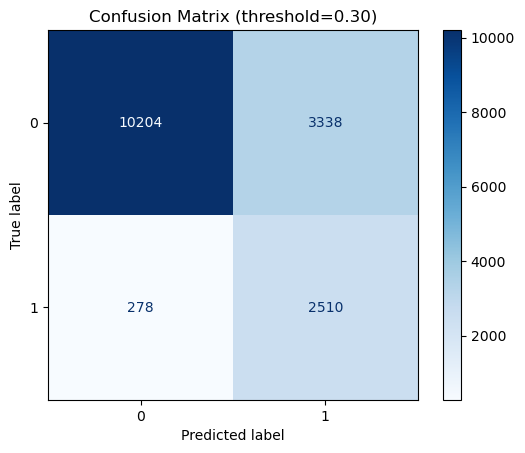

Recall: 0.900
Precision: 0.429


In [23]:
plot_confusion_with_threshold(XG_model, data.iloc[:,1:-1], data.label, 0.3)

# Deploy the model to the entire SD

In [24]:
sd_codes = pd.read_feather('/data100t1/share/synthetic-deriv/phecodes/all-sd-phecodes-mar-2025/sd_samples_phecode.binary.feather', columns = list(data.columns[:-1]), use_threads=True)

In [14]:
sd_codes.head()

,grid,250.11,250.1,535.6,250.21,537,264.1,535.2,758.1,535,...,262,550.2,532,276.14,276.41,276.4,244.1,578.1,270.3,695
0,R200000048,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,R200000069,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,R200000084,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,R200000141,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,R200000176,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
sd_codes.shape

(3414732, 115)

In [16]:
sd_codes.grid.nunique()

3414732

In [25]:
y_prob = XG_model.predict_proba(sd_codes.iloc[:,1:])[:, 1]
y_pred = (y_prob >= 0.4)
print(f'The number of positives is: {sum(y_pred)}')

The number of positives is: 647452
